# SEIR Modeling Basics
## Archetype 1: The Biomedical & Physical Scientist

This notebook introduces the classic Susceptible-Exposed-Infectious-Recovered (SEIR) model used in epidemiology to simulate disease outbreaks. Students will learn to adjust parameters like R₀ and recovery time to see how they dramatically alter the infection curve.

### Learning Objectives:
- Understand the basic structure of compartmental models in epidemiology
- Learn how to implement a SEIR model using Python
- Explore how different parameters affect disease dynamics
- Visualize epidemic curves and analyze their implications

### Key Concepts:
- **R₀**: Basic reproduction number - average number of secondary infections from one infected individual
- **Incubation period**: Time from exposure to becoming infectious
- **Recovery time**: Duration of infectious period
- **Herd immunity threshold**: Proportion of population that needs immunity to stop transmission

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

Matplotlib is building the font cache; this may take a moment.


## Part 1: Understanding the SEIR Model

The SEIR model divides the population into four compartments:
- **S**: Susceptible individuals who can become infected
- **E**: Exposed individuals who are infected but not yet infectious
- **I**: Infectious individuals who can transmit the disease
- **R**: Recovered (or removed) individuals who are immune or deceased

### Mathematical Equations:
- dS/dt = -β * S * I / N
- dE/dt = β * S * I / N - σ * E
- dI/dt = σ * E - γ * I
- dR/dt = γ * I

Where:
- β = transmission rate
- σ = 1/incubation_period (rate of becoming infectious)
- γ = 1/recovery_time (recovery rate)
- N = total population

In [2]:
def seir_model(y, t, beta, sigma, gamma, N):
    """
    SEIR model differential equations
    
    Parameters:
    y: list of current values [S, E, I, R]
    t: time
    beta: transmission rate
    sigma: rate of becoming infectious (1/incubation period)
    gamma: recovery rate (1/recovery time)
    N: total population
    """
    S, E, I, R = y
    
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dEdt, dIdt, dRdt]

def run_seir_simulation(N=100000, I0=10, E0=0, R0_value=2.5, 
                       incubation_period=5, recovery_time=10, days=365):
    """
    Run SEIR simulation with given parameters
    
    Parameters:
    N: total population
    I0: initial infected individuals
    E0: initial exposed individuals
    R0_value: basic reproduction number
    incubation_period: days from exposure to becoming infectious
    recovery_time: days to recover
    days: simulation duration
    """
    # Calculate rates
    sigma = 1.0 / incubation_period  # Rate of becoming infectious
    gamma = 1.0 / recovery_time      # Recovery rate
    beta = R0_value * gamma          # Transmission rate
    
    # Initial conditions
    S0 = N - I0 - E0
    y0 = [S0, E0, I0, 0]  # [S, E, I, R]
    
    # Time points
    t = np.linspace(0, days, days)
    
    # Solve ODE
    solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma, N))
    
    return t, solution, beta, sigma, gamma

## Part 2: Basic SEIR Simulation

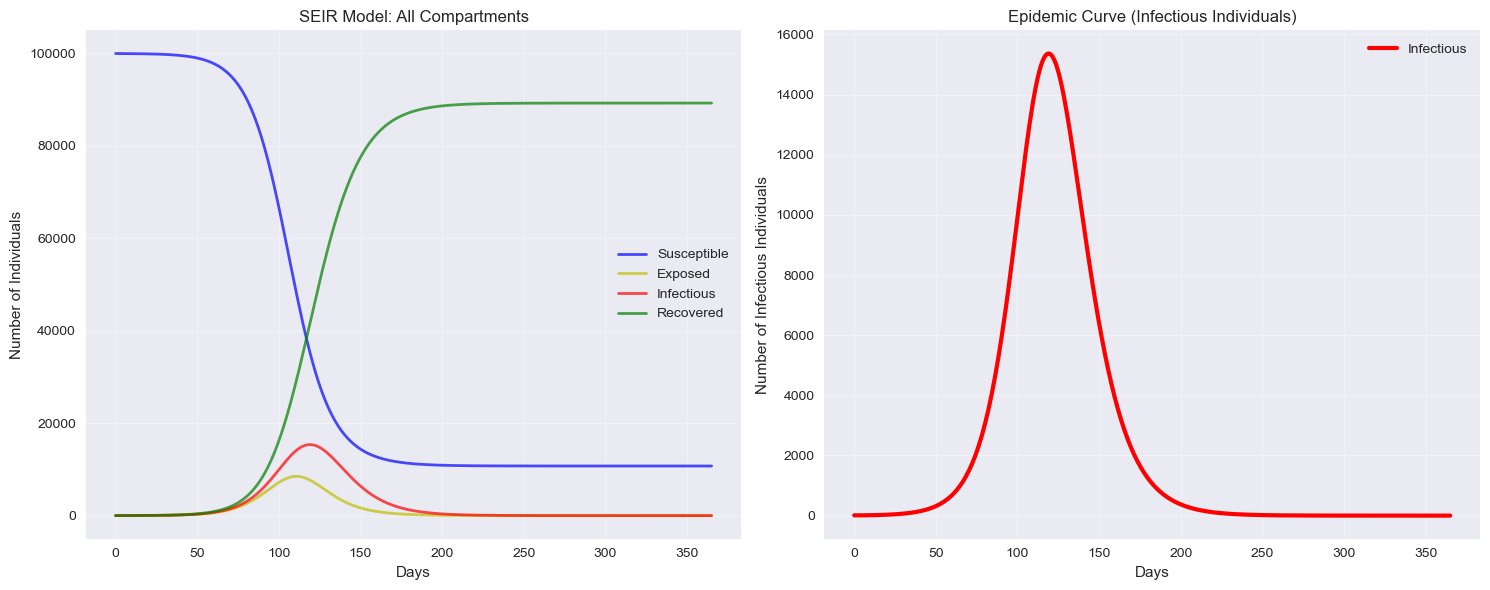


📊 Simulation Results:
Peak infections: 15,364 individuals
Peak day: Day 119
Total infected: 89,266 individuals
Attack rate: 89.3% of population

🧮 Model Parameters:
R₀: 2.5
Incubation period: 5 days
Recovery time: 10 days
β (transmission rate): 0.250
σ (1/incubation): 0.200
γ (1/recovery): 0.100


In [3]:
# Run a basic simulation with COVID-19-like parameters
t, solution, beta, sigma, gamma = run_seir_simulation(
    N=100000,           # Population of 100,000
    I0=10,              # Start with 10 infected individuals
    E0=0,               # No initially exposed
    R0_value=2.5,       # R₀ = 2.5 (similar to COVID-19)
    incubation_period=5, # 5-day incubation period
    recovery_time=10,   # 10-day recovery time
    days=365            # One year simulation
)

S, E, I, R = solution.T

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: All compartments
ax1.plot(t, S, 'b-', alpha=0.7, linewidth=2, label='Susceptible')
ax1.plot(t, E, 'y-', alpha=0.7, linewidth=2, label='Exposed')
ax1.plot(t, I, 'r-', alpha=0.7, linewidth=2, label='Infectious')
ax1.plot(t, R, 'g-', alpha=0.7, linewidth=2, label='Recovered')
ax1.set_xlabel('Days')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model: All Compartments')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Focus on infectious curve
ax2.plot(t, I, 'r-', linewidth=3, label='Infectious')
ax2.set_xlabel('Days')
ax2.set_ylabel('Number of Infectious Individuals')
ax2.set_title('Epidemic Curve (Infectious Individuals)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print key statistics
peak_infected = np.max(I)
peak_day = np.argmax(I)
total_infected = R[-1]  # Final number of recovered
attack_rate = (total_infected / 100000) * 100

print(f"\n📊 Simulation Results:")
print(f"Peak infections: {peak_infected:,.0f} individuals")
print(f"Peak day: Day {peak_day}")
print(f"Total infected: {total_infected:,.0f} individuals")
print(f"Attack rate: {attack_rate:.1f}% of population")
print(f"\n🧮 Model Parameters:")
print(f"R₀: 2.5")
print(f"Incubation period: 5 days")
print(f"Recovery time: 10 days")
print(f"β (transmission rate): {beta:.3f}")
print(f"σ (1/incubation): {sigma:.3f}")
print(f"γ (1/recovery): {gamma:.3f}")

## Part 3: Interactive Parameter Exploration

Now let's explore how different parameters affect the epidemic dynamics. This is crucial for understanding how interventions might work.

In [4]:
def interactive_seir_plot(R0_value=2.5, incubation_period=5, recovery_time=10):
    """
    Interactive SEIR plotting function
    """
    t, solution, beta, sigma, gamma = run_seir_simulation(
        R0_value=R0_value,
        incubation_period=incubation_period,
        recovery_time=recovery_time
    )
    
    S, E, I, R = solution.T
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, S, 'b-', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(t, E, 'y-', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(t, I, 'r-', alpha=0.7, linewidth=2, label='Infectious')
    plt.plot(t, R, 'g-', alpha=0.7, linewidth=2, label='Recovered')
    plt.xlabel('Days')
    plt.ylabel('Number of Individuals')
    plt.title(f'SEIR Model: R₀={R0_value}, Incubation={incubation_period}d, Recovery={recovery_time}d')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, I, 'r-', linewidth=3)
    plt.xlabel('Days')
    plt.ylabel('Infectious Individuals')
    plt.title('Epidemic Curve')
    plt.grid(True, alpha=0.3)
    
    # Calculate and display key metrics
    peak_infected = np.max(I)
    peak_day = np.argmax(I)
    total_infected = R[-1]
    attack_rate = (total_infected / 100000) * 100
    
    plt.figtext(0.02, 0.02, f'Peak: {peak_infected:,.0f} on day {peak_day} | Total infected: {total_infected:,.0f} ({attack_rate:.1f}%)', 
                fontsize=10, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Create interactive widgets
interact = widgets.interact(
    interactive_seir_plot,
    R0_value=widgets.FloatSlider(value=2.5, min=0.5, max=5.0, step=0.1, description='R₀:'),
    incubation_period=widgets.IntSlider(value=5, min=1, max=14, step=1, description='Incubation (days):'),
    recovery_time=widgets.IntSlider(value=10, min=3, max=21, step=1, description='Recovery (days):')
)

interactive(children=(FloatSlider(value=2.5, description='R₀:', max=5.0, min=0.5), IntSlider(value=5, descript…

## Part 4: Comparing Different Scenarios

Let's compare different disease scenarios to understand the impact of various parameters.

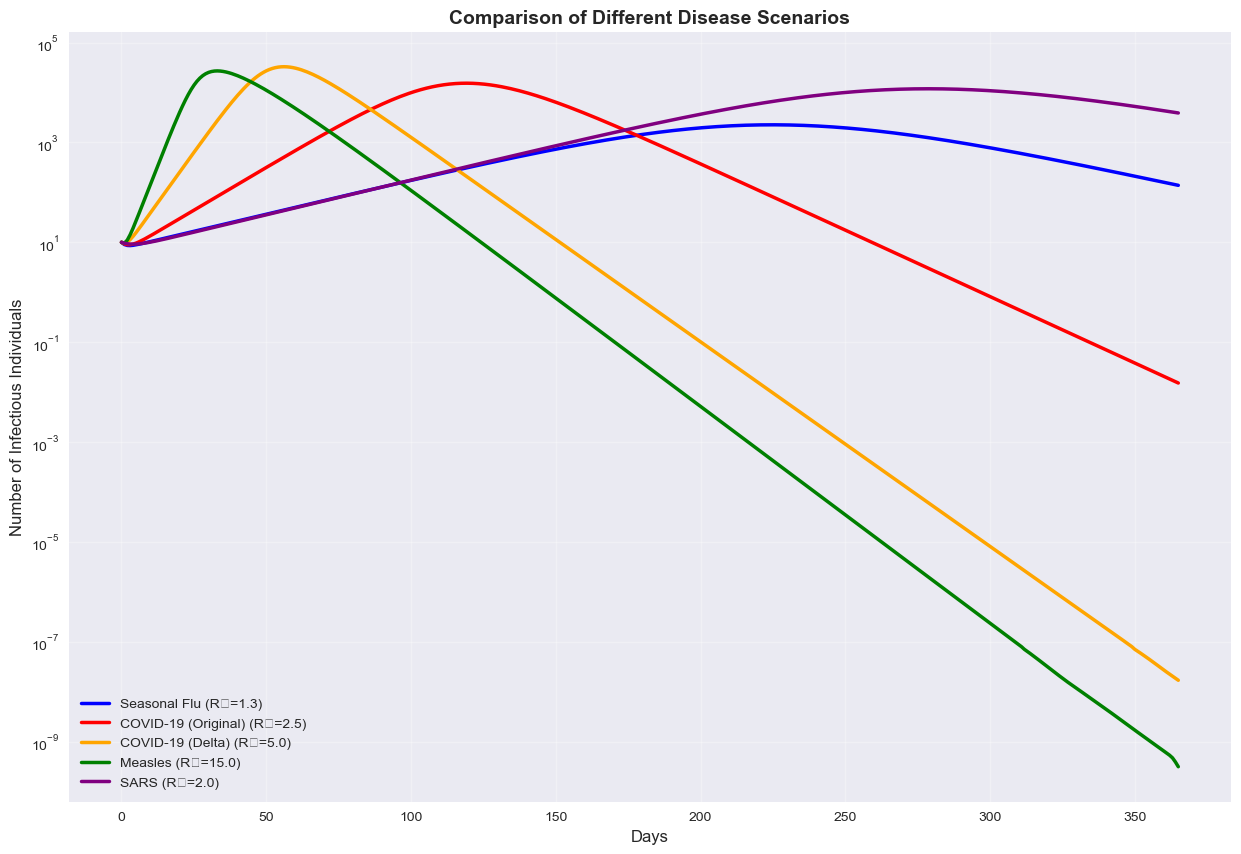


📋 Scenario Comparison Summary:
                     Peak Infected  Peak Day  Total Infected  Attack Rate (%)    R₀
Seasonal Flu                2256.4     224.0         41630.5             41.6   1.3
COVID-19 (Original)        15363.9     119.0         89265.9             89.3   2.5
COVID-19 (Delta)           32852.8      56.0         99302.4             99.3   5.0
Measles                    27081.0      33.0        100000.0            100.0  15.0
SARS                       11883.8     278.0         71608.2             71.6   2.0


In [5]:
# Define different disease scenarios
scenarios = {
    'Seasonal Flu': {'R0': 1.3, 'incubation': 2, 'recovery': 7},
    'COVID-19 (Original)': {'R0': 2.5, 'incubation': 5, 'recovery': 10},
    'COVID-19 (Delta)': {'R0': 5.0, 'incubation': 4, 'recovery': 10},
    'Measles': {'R0': 15.0, 'incubation': 10, 'recovery': 7},
    'SARS': {'R0': 2.0, 'incubation': 6, 'recovery': 21}
}

plt.figure(figsize=(15, 10))

colors = ['blue', 'red', 'orange', 'green', 'purple']
results = {}

for i, (name, params) in enumerate(scenarios.items()):
    t, solution, beta, sigma, gamma = run_seir_simulation(
        R0_value=params['R0'],
        incubation_period=params['incubation'],
        recovery_time=params['recovery'],
        days=365
    )
    
    S, E, I, R = solution.T
    
    # Store results for summary table
    results[name] = {
        'Peak Infected': np.max(I),
        'Peak Day': np.argmax(I),
        'Total Infected': R[-1],
        'Attack Rate (%)': (R[-1] / 100000) * 100,
        'R₀': params['R0']
    }
    
    plt.plot(t, I, color=colors[i], linewidth=2.5, label=f"{name} (R₀={params['R0']})")

plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of Infectious Individuals', fontsize=12)
plt.title('Comparison of Different Disease Scenarios', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale to see all curves clearly
plt.show()

# Create summary table
results_df = pd.DataFrame(results).T
results_df = results_df.round(1)
print("\n📋 Scenario Comparison Summary:")
print(results_df.to_string())

## Part 5: Understanding Herd Immunity

The herd immunity threshold is the proportion of the population that needs to be immune to stop transmission. It's calculated as: **HIT = 1 - 1/R₀**

/var/folders/vn/ms168tz176s3h1qxh01bs1m40000gn/T/ipykernel_49732/3365677016.py:49: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/wgray13/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


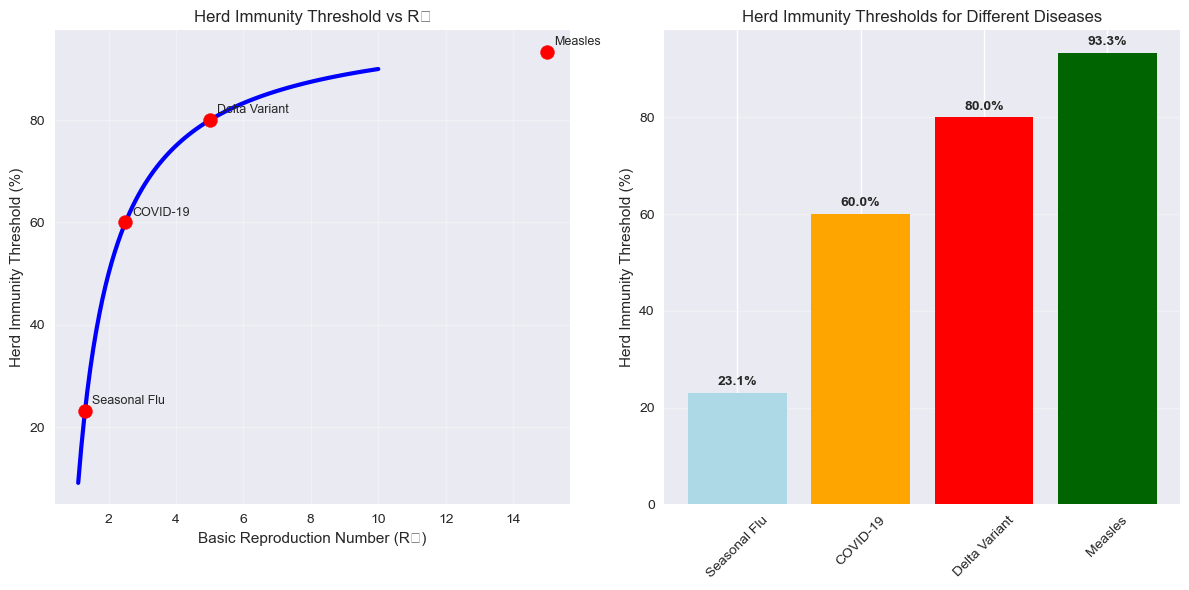


🎯 Key Insights about Herd Immunity:
Seasonal Flu: R₀ = 1.3, HIT = 23.1%
COVID-19: R₀ = 2.5, HIT = 60.0%
Delta Variant: R₀ = 5.0, HIT = 80.0%
Measles: R₀ = 15.0, HIT = 93.3%

💡 What this means:
- Higher R₀ requires higher vaccination coverage to achieve herd immunity
- Measles requires ~93% immunity - why measles outbreaks occur when vaccination rates drop
- COVID-19 variants with higher R₀ make herd immunity harder to achieve


In [6]:
def calculate_herd_immunity_threshold(R0_values):
    """
    Calculate herd immunity threshold for different R₀ values
    """
    hit_values = []
    for R0 in R0_values:
        if R0 > 1:
            hit = 1 - (1/R0)
            hit_values.append(hit * 100)  # Convert to percentage
        else:
            hit_values.append(0)  # No herd immunity needed if R₀ < 1
    return hit_values

# Range of R₀ values
R0_range = np.linspace(1.1, 10, 100)
hit_values = calculate_herd_immunity_threshold(R0_range)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(R0_range, hit_values, 'b-', linewidth=3)
plt.xlabel('Basic Reproduction Number (R₀)')
plt.ylabel('Herd Immunity Threshold (%)')
plt.title('Herd Immunity Threshold vs R₀')
plt.grid(True, alpha=0.3)

# Add markers for common diseases
disease_R0 = [1.3, 2.5, 5.0, 15.0]
disease_names = ['Seasonal Flu', 'COVID-19', 'Delta Variant', 'Measles']
disease_hit = calculate_herd_immunity_threshold(disease_R0)

plt.scatter(disease_R0, disease_hit, s=100, c='red', zorder=5)
for i, name in enumerate(disease_names):
    plt.annotate(name, (disease_R0[i], disease_hit[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.subplot(1, 2, 2)
# Bar chart of herd immunity thresholds
plt.bar(disease_names, disease_hit, color=['lightblue', 'orange', 'red', 'darkgreen'])
plt.ylabel('Herd Immunity Threshold (%)')
plt.title('Herd Immunity Thresholds for Different Diseases')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add percentage labels on bars
for i, v in enumerate(disease_hit):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights about Herd Immunity:")
for i, name in enumerate(disease_names):
    print(f"{name}: R₀ = {disease_R0[i]}, HIT = {disease_hit[i]:.1f}%")

print("\n💡 What this means:")
print("- Higher R₀ requires higher vaccination coverage to achieve herd immunity")
print("- Measles requires ~93% immunity - why measles outbreaks occur when vaccination rates drop")
print("- COVID-19 variants with higher R₀ make herd immunity harder to achieve")

## Part 6: Modeling Interventions

Let's see how public health interventions affect the epidemic curve by reducing the effective reproduction number.

ValueError: x and y must have same first dimension, but have shapes (365,) and (364,)

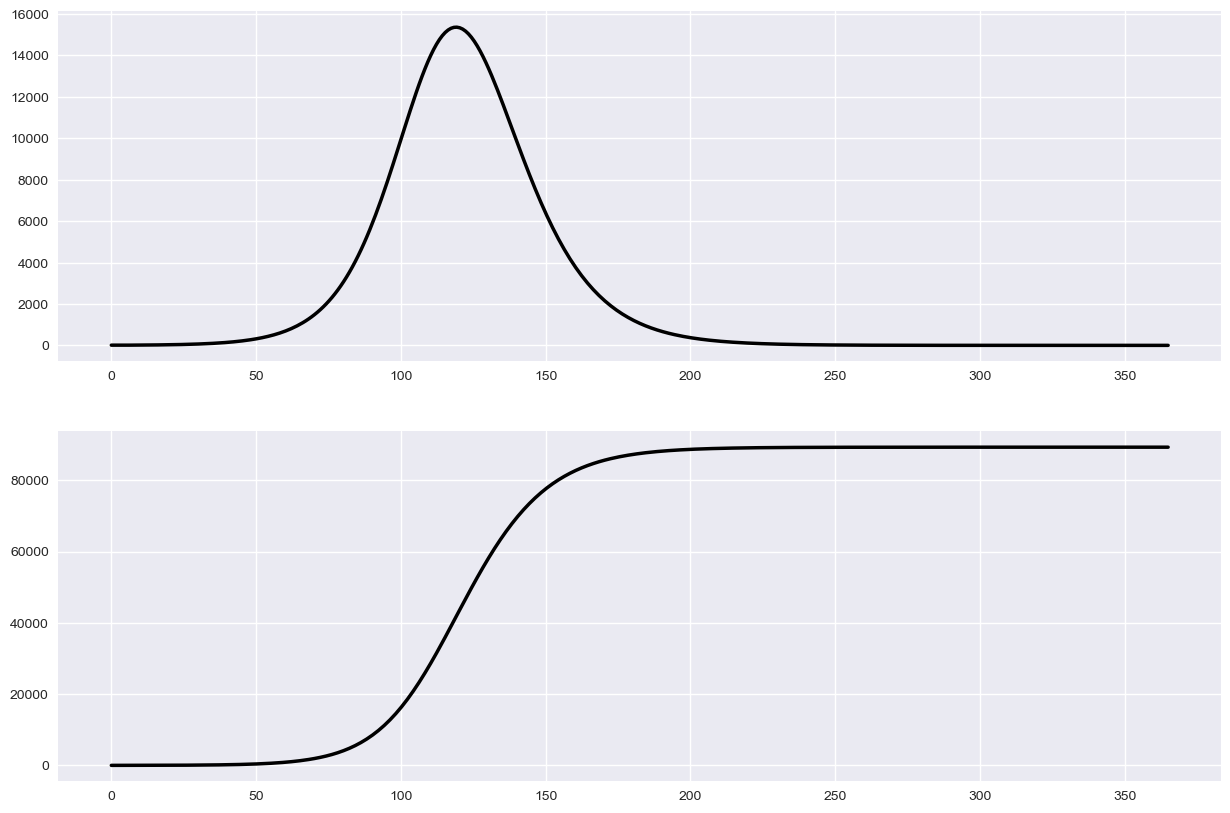

In [7]:
def seir_with_intervention(intervention_day=60, intervention_effectiveness=0.5):
    """
    Model SEIR with intervention that reduces transmission
    """
    # Parameters
    N = 100000
    I0 = 10
    E0 = 0
    S0 = N - I0 - E0
    R0_original = 2.5
    incubation_period = 5
    recovery_time = 10
    days = 365
    
    # Calculate rates
    sigma = 1.0 / incubation_period
    gamma = 1.0 / recovery_time
    beta_original = R0_original * gamma
    beta_intervention = beta_original * (1 - intervention_effectiveness)
    
    # Time points
    t = np.linspace(0, days, days)
    
    # Split simulation into pre and post intervention
    t1 = t[t <= intervention_day]
    t2 = t[t > intervention_day]
    
    # Initial conditions
    y0 = [S0, E0, I0, 0]
    
    # Pre-intervention
    if len(t1) > 0:
        sol1 = odeint(seir_model, y0, t1, args=(beta_original, sigma, gamma, N))
        # Use final state as initial condition for post-intervention
        y1 = sol1[-1]
    else:
        sol1 = np.array([y0])
        y1 = y0
    
    # Post-intervention
    if len(t2) > 0:
        sol2 = odeint(seir_model, y1, t2, args=(beta_intervention, sigma, gamma, N))
        # Combine solutions
        if len(t1) > 0:
            solution = np.vstack([sol1[:-1], sol2])  # Remove duplicate point
        else:
            solution = sol2
    else:
        solution = sol1
    
    return t, solution, intervention_day, R0_original * (1 - intervention_effectiveness)

# Compare scenarios with different interventions
interventions = [
    {'name': 'No Intervention', 'day': None, 'effectiveness': 0},
    {'name': 'Masks (30% reduction)', 'day': 60, 'effectiveness': 0.3},
    {'name': 'Social Distancing (50% reduction)', 'day': 60, 'effectiveness': 0.5},
    {'name': 'Lockdown (80% reduction)', 'day': 60, 'effectiveness': 0.8}
]

plt.figure(figsize=(15, 10))
colors = ['black', 'blue', 'orange', 'red']

for i, intervention in enumerate(interventions):
    if intervention['day'] is None:
        # No intervention baseline
        t, solution, _, _, _ = run_seir_simulation(R0_value=2.5)
        effective_R = 2.5
    else:
        t, solution, intervention_day, effective_R = seir_with_intervention(
            intervention_day=intervention['day'],
            intervention_effectiveness=intervention['effectiveness']
        )
    
    S, E, I, R = solution.T
    
    plt.subplot(2, 1, 1)
    plt.plot(t, I, color=colors[i], linewidth=2.5, 
             label=f"{intervention['name']} (Effective R = {effective_R:.1f})")
    
    plt.subplot(2, 1, 2)
    plt.plot(t, R, color=colors[i], linewidth=2.5, 
             label=f"{intervention['name']} (Final: {int(R[-1]):,})")

# Add intervention line
plt.subplot(2, 1, 1)
plt.axvline(x=60, color='gray', linestyle='--', alpha=0.7, label='Intervention Start')
plt.xlabel('Days')
plt.ylabel('Infectious Individuals')
plt.title('Effect of Interventions on Infectious Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.axvline(x=60, color='gray', linestyle='--', alpha=0.7, label='Intervention Start')
plt.xlabel('Days')
plt.ylabel('Cumulative Recovered/Infected')
plt.title('Cumulative Impact of Interventions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Key Intervention Insights:")
print("- Early intervention is crucial - timing matters as much as effectiveness")
print("- Even modest reductions in transmission can dramatically reduce total cases")
print("- Stronger interventions can both delay and reduce the peak")
print("- The area under the curve represents total infections over time")

## Part 7: Exercises and Discussion Questions

### 🎯 Practice Exercises:

1. **Parameter Sensitivity**: Use the interactive widget to explore how a 20% change in R₀ affects the peak and total infections.

2. **Intervention Timing**: Modify the intervention code to test what happens if the intervention starts at day 30 vs day 90.

3. **Multiple Waves**: How might you modify the model to simulate a second wave after interventions are lifted?

### 🤔 Discussion Questions:

1. **Real-world Limitations**: What assumptions does the SEIR model make that might not hold in reality?

2. **Policy Implications**: Based on your simulations, what would you recommend to policymakers about intervention timing and strength?

3. **Interdisciplinary Connections**: How might the insights from this biomedical model inform the work of:
   - Economists (healthcare costs, economic impact)
   - Socio-behavioral scientists (compliance with interventions)
   - Built environment specialists (spatial transmission patterns)

### 📚 Further Reading:

- Hethcote, H. W. (2000). The mathematics of infectious diseases. SIAM review, 42(4), 599-653.
- Kermack, W. O., & McKendrick, A. G. (1927). A contribution to the mathematical theory of epidemics.
- Anderson, R. M., & May, R. M. (1991). Infectious diseases of humans: dynamics and control.

### 💡 Key Takeaways:

- **R₀ is fundamental**: Small changes in R₀ can lead to dramatically different outcomes
- **Timing matters**: Early intervention is much more effective than late intervention
- **Parameter interactions**: Incubation period and recovery time interact with R₀ to determine epidemic dynamics
- **Herd immunity threshold**: Higher R₀ diseases require higher population immunity to control
- **Model limitations**: SEIR models are simplified representations - real epidemics are more complex

---

*This notebook demonstrates the foundational epidemiological modeling skills essential for biomedical scientists working in pandemic preparedness and response. The SEIR model serves as a building block for more sophisticated models that incorporate spatial structure, age stratification, and other real-world complexities.*

In [ ]:
# Bonus: Create a simple SIR model comparison for advanced students
def sir_model(y, t, beta, gamma, N):
    """
    Simple SIR model (no exposed compartment)
    """
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Compare SIR vs SEIR
N = 100000
I0 = 10
R0_value = 2.5
recovery_time = 10
incubation_period = 5
days = 200

# SIR model
gamma = 1.0 / recovery_time
beta = R0_value * gamma
t = np.linspace(0, days, days)
y0_sir = [N - I0, I0, 0]
sol_sir = odeint(sir_model, y0_sir, t, args=(beta, gamma, N))

# SEIR model
sigma = 1.0 / incubation_period
y0_seir = [N - I0, 0, I0, 0]
sol_seir = odeint(seir_model, y0_seir, t, args=(beta, sigma, gamma, N))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, sol_sir[:, 1], 'r-', linewidth=3, label='SIR Model')
plt.plot(t, sol_seir[:, 2], 'b--', linewidth=3, label='SEIR Model')
plt.xlabel('Days')
plt.ylabel('Infectious Individuals')
plt.title('SIR vs SEIR: Infectious Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t, sol_sir[:, 2], 'r-', linewidth=3, label='SIR Model')
plt.plot(t, sol_seir[:, 3], 'b--', linewidth=3, label='SEIR Model')
plt.xlabel('Days')
plt.ylabel('Recovered Individuals')
plt.title('SIR vs SEIR: Cumulative Cases')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔬 SIR vs SEIR Comparison:")
print(f"SIR peak infections: {np.max(sol_sir[:, 1]):,.0f}")
print(f"SEIR peak infections: {np.max(sol_seir[:, 2]):,.0f}")
print(f"SIR total infected: {sol_sir[-1, 2]:,.0f}")
print(f"SEIR total infected: {sol_seir[-1, 3]:,.0f}")
print("\n💡 The incubation period in SEIR delays but doesn't dramatically change the overall epidemic size.")